In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

print(os.getcwd())

/data/Documents/DataScience/Courses/Dissertation/src/benchmark


## CVC5 Results

In [6]:
df = pd.read_csv('sygus_solver_cvc5_results.csv')
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2910 entries, 0 to 2909
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   run_id        2910 non-null   object 
 1   run_datetime  2910 non-null   object 
 2   solver        2910 non-null   object 
 3   config        2910 non-null   object 
 4   file          2910 non-null   object 
 5   return_code   2910 non-null   int64  
 6   time          2910 non-null   float64
 7   stdout        2596 non-null   object 
 8   stderr        314 non-null    object 
dtypes: float64(1), int64(1), object(7)
memory usage: 204.7+ KB
None
                                 run_id                run_datetime solver  \
0  80a4067e-b8b2-46a4-a1d0-0ae31aaf0a7b  2024-08-05T14:32:03.739996   cvc5   
1  80a4067e-b8b2-46a4-a1d0-0ae31aaf0a7b  2024-08-05T14:32:03.739996   cvc5   
2  80a4067e-b8b2-46a4-a1d0-0ae31aaf0a7b  2024-08-05T14:32:03.739996   cvc5   
3  80a4067e-b8b2-46a4-a1d0-0ae31aaf0a7b 

In [7]:
config_counts = df['config'].value_counts()
print("Configuration counts:")
print(config_counts)

Configuration counts:
config
--tlimit=30000 --sygus-enum=smart                                  194
--tlimit=30000 --sygus-enum=random                                 194
--tlimit=30000 --sygus-enum=fast                                   194
--tlimit=30000 --sygus-enum=var-agnostic                           194
--tlimit=30000 --sygus-enum=smart --sygus-si=none                  194
--tlimit=30000 --sygus-enum=smart --sygus-si=use                   194
--tlimit=30000 --sygus-enum=smart --sygus-si=all                   194
--tlimit=30000 --sygus-enum=smart --sygus-abort-size=10            194
--tlimit=30000 --sygus-enum=smart --sygus-abort-size=20            194
--tlimit=30000 --sygus-enum=smart --sygus-grammar-cons=simple      194
--tlimit=30000 --sygus-enum=smart --sygus-grammar-cons=any-term    194
--tlimit=30000 --sygus-enum=smart --sygus-fair=direct              194
--tlimit=30000 --sygus-enum=smart --sygus-fair=dt-size-bound       194
--tlimit=30000 --sygus-enum=smart --sygus-fair=n

In [8]:
avg_times = df.groupby('config')['time'].mean().sort_values(ascending=False)
print("\nAverage execution times:")
print(avg_times)


Average execution times:
config
--tlimit=30000 --sygus-enum=smart --sygus-si=none                  21.521946
--tlimit=30000 --sygus-enum=smart --sygus-grammar-cons=any-term     2.750932
--tlimit=30000 --sygus-enum=var-agnostic                            1.513923
--tlimit=30000 --sygus-enum=random                                  1.411360
--tlimit=30000 --sygus-enum=smart --sygus-fair=direct               1.264603
--tlimit=30000 --sygus-enum=fast                                    1.249223
--tlimit=30000 --sygus-enum=smart                                   1.234327
--tlimit=30000 --sygus-enum=smart --sygus-si=use                    1.232530
--tlimit=30000 --sygus-enum=smart --sygus-abort-size=20             1.230996
--tlimit=30000 --sygus-enum=smart --sygus-si=all                    1.230177
--tlimit=30000 --sygus-enum=smart --sygus-grammar-cons=simple       1.230172
--tlimit=30000 --sygus-enum=smart --sygus-abort-size=10             1.229578
--tlimit=30000 --sygus-enum=smart --sygus-r

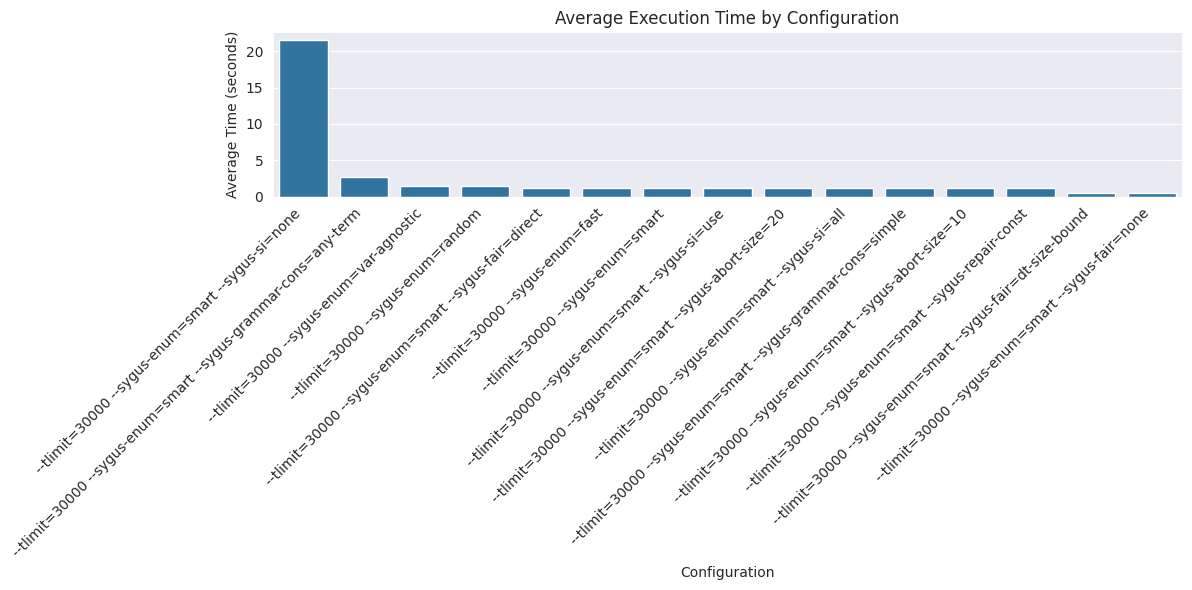

In [9]:
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_times.index, y=avg_times.values)
plt.title('Average Execution Time by Configuration')
plt.xlabel('Configuration')
plt.ylabel('Average Time (seconds)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

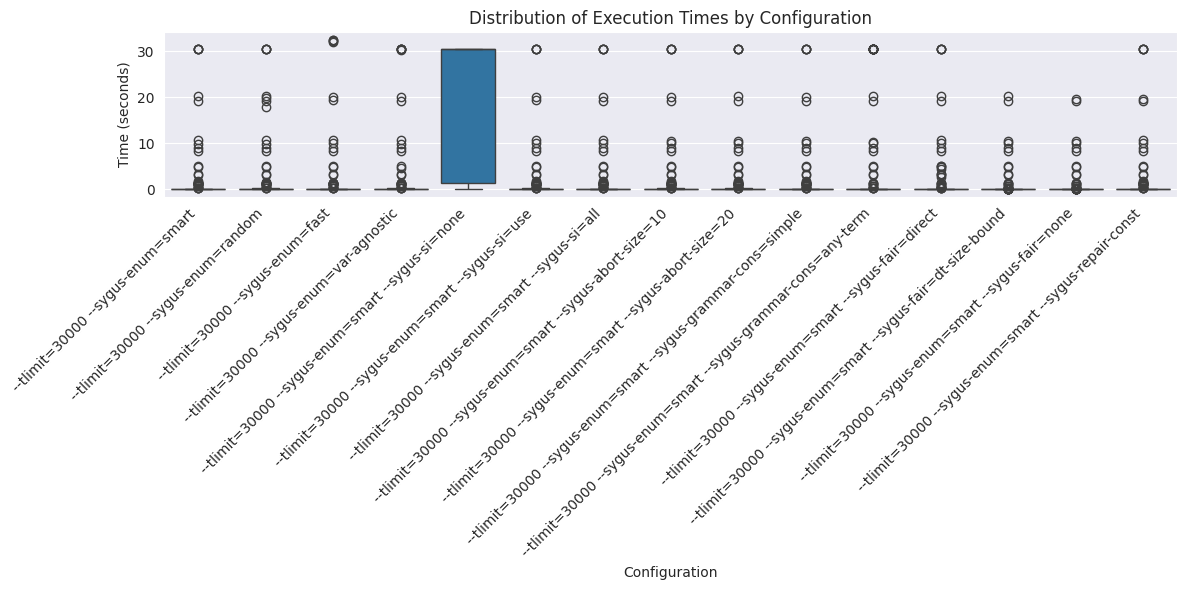

In [10]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='config', y='time', data=df)
plt.title('Distribution of Execution Times by Configuration')
plt.xlabel('Configuration')
plt.ylabel('Time (seconds)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Return code counts:
return_code
 0    2596
-6     194
 1     120
Name: count, dtype: int64


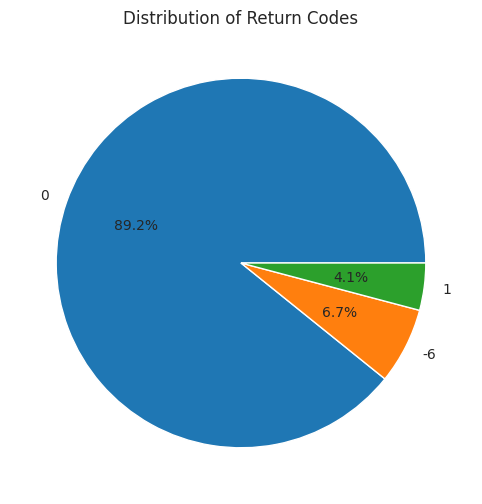

In [11]:
return_code_counts = df['return_code'].value_counts()
print("\nReturn code counts:")
print(return_code_counts)

plt.figure(figsize=(8, 6))
return_code_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Return Codes')
plt.ylabel('')
plt.show()

## Partial PySynthLab Scoring Analysis

In [ ]:
# import matplotlib.pyplot as plt
# import pandas as pd
# import numpy as np
# 
# def analyze_results(results):
#     df = pd.DataFrame(results)
# 
#     plt.figure(figsize=(10, 6))
#     plt.scatter(df[df['success']]['metrics'].apply(lambda x: x['time_spent']),
#                 df[df['success']]['metrics'].apply(lambda x: x['solution_complexity']),
#                 c=df[df['success']]['metrics'].apply(lambda x: x['solution_height']),
#                 cmap='viridis')
#     plt.colorbar(label='Solution Height')
#     plt.xlabel('Time Spent (s)')
#     plt.ylabel('Solution Complexity')
#     plt.title('Time Spent vs. Solution Complexity')
#     plt.show()
# 
# 
#     plt.figure(figsize=(10, 6))
#     for i, result in enumerate(results):
#         if result['success']:
#             plt.plot(result['metrics']['partial_satisfaction_scores'], label=f"Config {i}")
#     plt.xlabel('Iterations')
#     plt.ylabel('Partial Satisfaction Score')
#     plt.title('Partial Satisfaction Score Progression')
#     plt.legend()
#     plt.show()
# 
# 
#     print(df.groupby('config').agg({
#         'success': 'mean',
#         'metrics': lambda x: pd.Series({
#             'avg_time': np.mean([m['time_spent'] for m in x]),
#             'avg_iterations': np.mean([m['iterations'] for m in x]),
#             'avg_candidates': np.mean([m['candidates_generated'] for m in x]),
#         })
#     }))
